# Python for Data Analysis II




**Agenda:**

    * matplotlib
    * seaborn
    * numpy
    * scipy

# Basic plotting

In [61]:
import matplotlib.pyplot as plt

In [62]:
%matplotlib inline

In [63]:
import pandas as pd

In [64]:
df = pd.read_csv('Churn-Modelling.csv')

In [65]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,NaN,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            9992 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    9985 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [68]:
df.dropna(inplace=True)

## Boxplot

{'boxes': [<matplotlib.lines.Line2D at 0x7fdfe9603748>],
 'caps': [<matplotlib.lines.Line2D at 0x7fdfe9617748>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdfe9624550>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fdfe9614eb8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fdfe96098d0>,
  <matplotlib.lines.Line2D at 0x7fdfe9617d30>]}

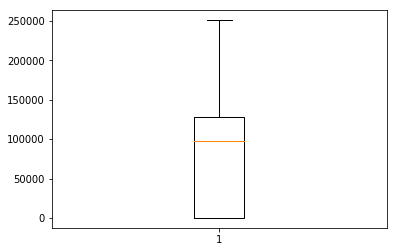

In [69]:
plt.boxplot(df.Balance)

### Plot

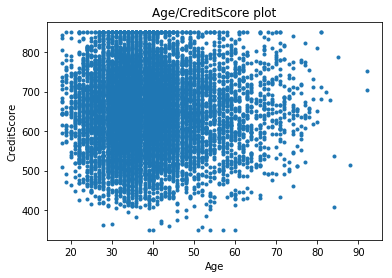

In [70]:
plt.plot(df.Age, df.CreditScore, '.')
plt.xlabel('Age')
plt.ylabel('CreditScore')
plt.title('Age/CreditScore plot')
plt.show()

(array([8.26141836e-03, 2.94160667e-02, 4.90674078e-02, 2.52718142e-02,
        1.11732298e-02, 7.08315050e-03, 2.81700823e-03, 1.72000022e-03,
        2.70866176e-04, 5.41732352e-05]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <a list of 10 Patch objects>)

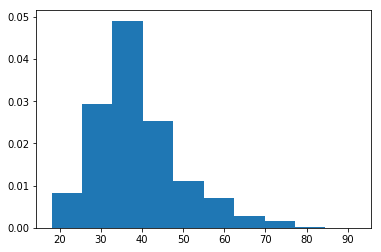

In [71]:
plt.hist(df.Age.values, normed=True)

(array([  18.,  165.,  447.,  956., 1442., 1861., 1948., 1523.,  964.,
         654.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <a list of 10 Patch objects>)

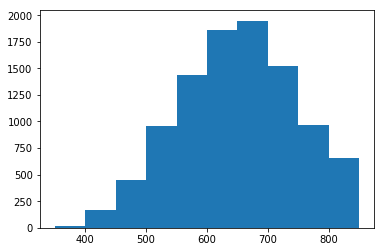

In [72]:
plt.hist(df.CreditScore.values)

(array([  18.,  165.,  447.,  956., 1442., 1861., 1948., 1523.,  964.,
         654.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <a list of 10 Patch objects>)

/home/kirill/.local/lib/python3.5/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


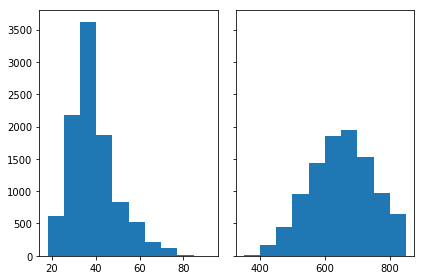

In [73]:
_, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(df.Age.values, bins=10)
axs[1].hist(df.CreditScore.values, bins=10)

### Bar plot

<Container object of 2 artists>

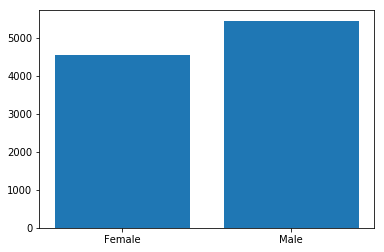

In [74]:
plt.bar(df.Gender.value_counts().keys(), df.Gender.value_counts().values)

### Horizontal bar plot

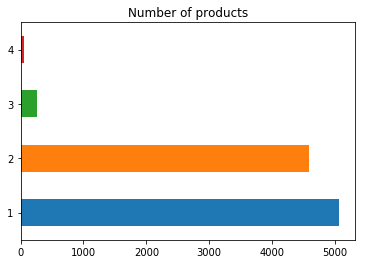

In [75]:
df.NumOfProducts.value_counts().plot(kind='barh',title="Number of products");

### Pie chart

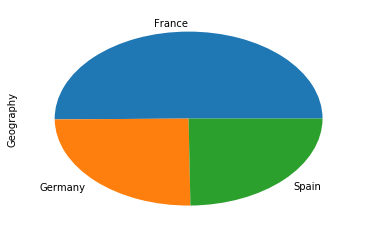

In [76]:
df.Geography.value_counts().plot(kind='pie');

We can plot more interesting plots, with matplotlib already embedded into pandas functions. For example:

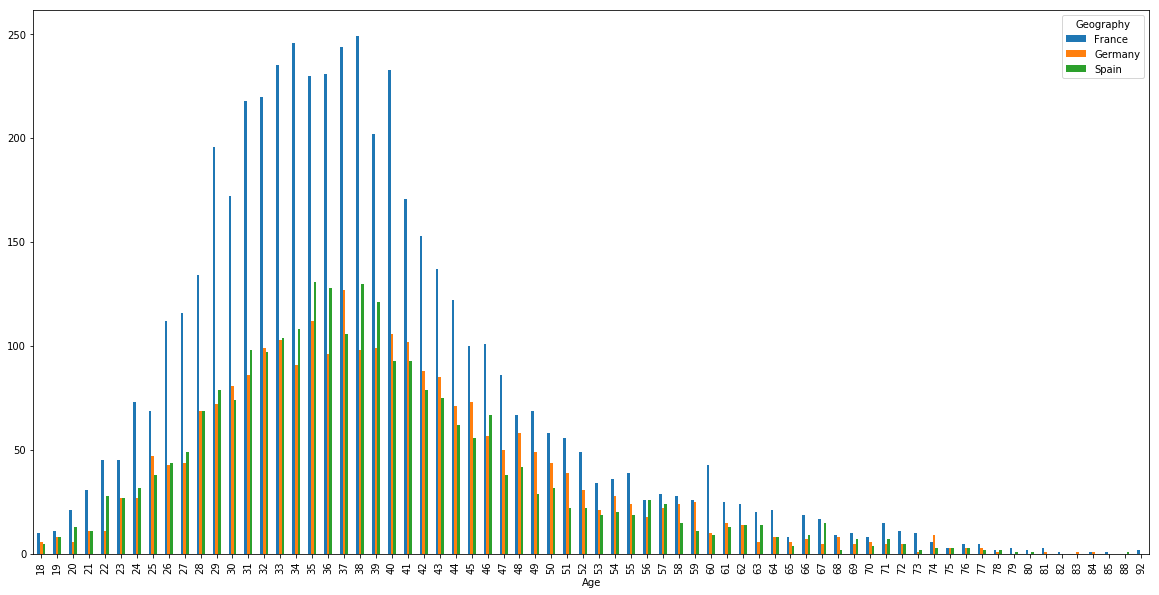

In [77]:
df.groupby(['Age', 'Geography']).size().unstack('Geography').plot(kind='bar', figsize=(20,10))

# Seaborn basic plotting

In [78]:
import seaborn as sns

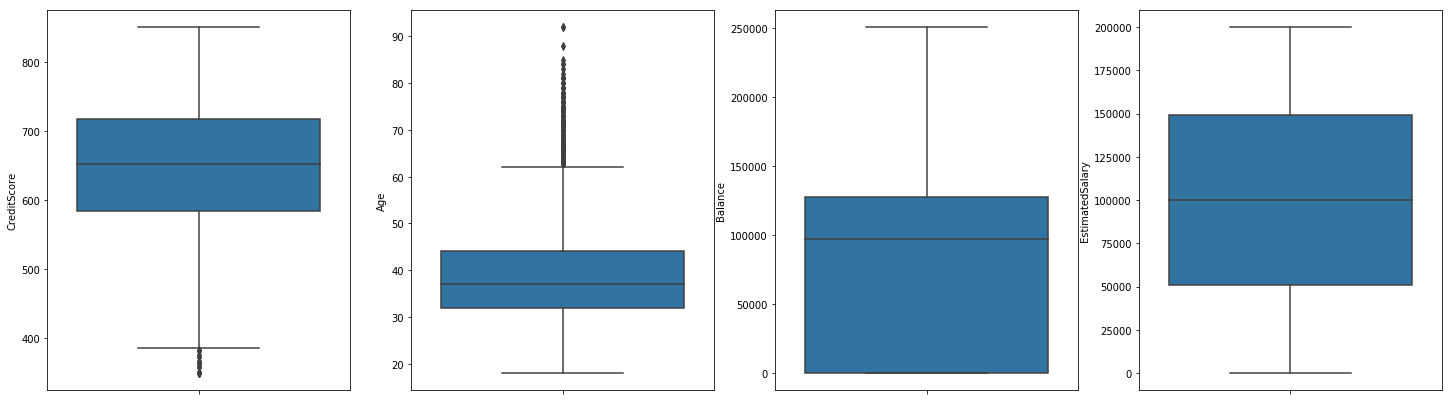

In [79]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(25, 7))
for (index, col) in enumerate(['CreditScore', 'Age', 'Balance', 'EstimatedSalary']):
    sns.boxplot(data=df, y=col, ax=axes[index])

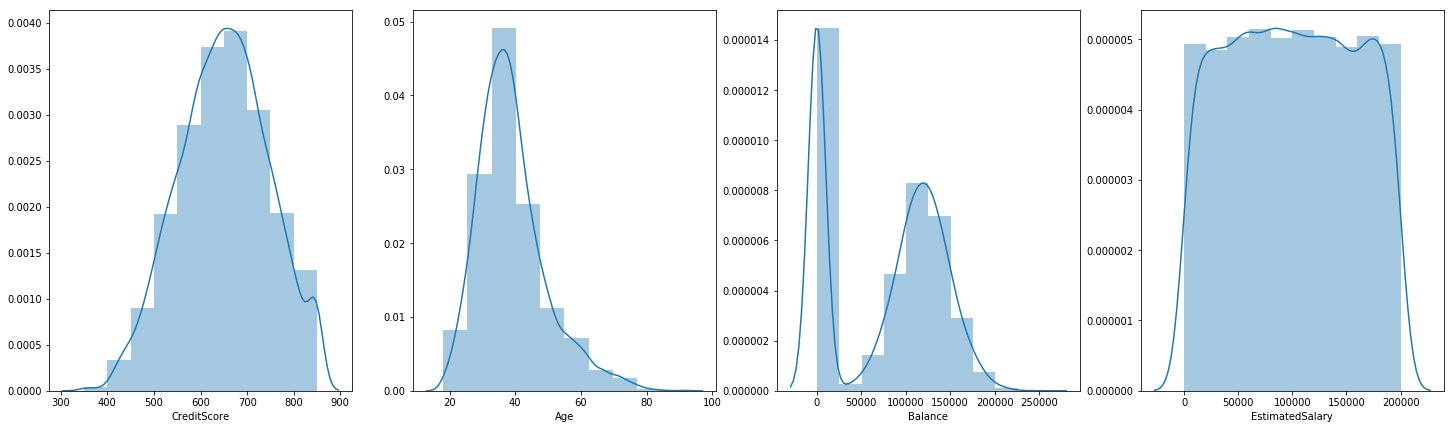

In [80]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(25, 7))
for (index, col) in enumerate(['CreditScore', 'Age', 'Balance', 'EstimatedSalary']):
    sns.distplot(df[col], bins=10, ax=axes[index])

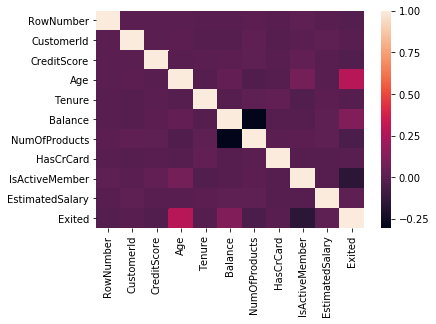

In [81]:
sns.heatmap(df.corr())

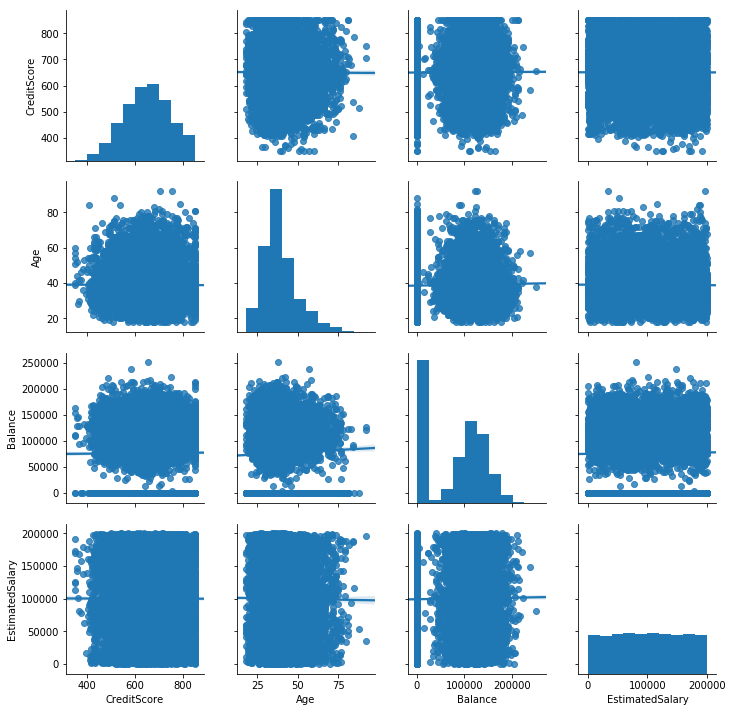

In [83]:
# Plot pairwise relationships in a dataset.
sns.pairplot(data=df, vars=['CreditScore', 'Age', 'Balance', 'EstimatedSalary'], kind='reg')  

# Extra

In [ ]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding='windows-1252')

In [ ]:
kill.head()

In [ ]:
kill.info()

In [ ]:
kill.dropna(inplace=True)

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
sns.countplot(kill.gender, ax=axes[0])
axes[0].set_title('Genders killed', color='blue', fontsize=15)
sns.countplot(kill.manner_of_death, ax=axes[1])
axes[1].set_title('Manner of death', color='blue', fontsize=15)

In [ ]:
# kill weapon
armed = kill.armed.value_counts()
plt.figure(figsize=(20,7))
sns.barplot(x=armed[:7].index,y=armed[:7].values)
plt.ylabel('Number of Weapon')
plt.xlabel('Weapon Types')
plt.title('Kill weapon',color = 'blue',fontsize=15)

In [ ]:
# Threat types
plt.figure(figsize=(20,10))
sns.countplot(kill.threat_level)
plt.xlabel('Threat Types')
plt.title('Threat types',color = 'blue', fontsize = 15)

In [ ]:
# Most dangerous cities
city = kill.city.value_counts()
plt.figure(figsize=(20,10))
sns.barplot(x=city[:12].index,y=city[:12].values)
plt.xticks(rotation=45)
plt.title('Most dangerous cities',color='red',fontsize=15)

In [ ]:
# Kill numbers from states in kill data
sta = kill.state.value_counts().index[:10]
plt.figure(figsize=(20,10))
sns.barplot(x=sta,y = kill.state.value_counts().values[:10])
plt.title('Kill Numbers from States',color = 'blue',fontsize=15)

# Numpy

Install numpy https://www.scipy.org/install.html

In [95]:
import numpy as np

In [ ]:
np.__version__

## Arrays

The central feature of NumPy is the array object class. Arrays are similar to lists in Python,
except that every element of an array must be of the same type, typically a numeric type like
float or int. Arrays make operations with large amounts of numeric data very fast and are
generally much more efficient than lists.

In [ ]:
a = np.array([1, 4, 5, 8], float)

In [ ]:
type(a)

In [ ]:
a

Here, the function array takes two arguments: the list to be converted into the array and the
type of each member of the list. Array elements are accessed, sliced, and manipulated just like
lists:

In [ ]:
a[:2]

In [ ]:
a[3]

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]], float)

In [ ]:
a

In [ ]:
a[0,0]

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]], float)
a[1,:]

In [ ]:
a[:,2]

In [ ]:
a.shape

In [ ]:
a = np.array(range(6), float).reshape((2, 3))

In [ ]:
a

In [ ]:
a.transpose()

In [ ]:
a = np.array([1,2], float)
b = np.array([3,4,5,6], float)
c = np.array([7,8,9], float)
np.concatenate((a, b, c))

## Other ways to create arrays

In [21]:
np.arange(5, dtype=float)

NameError: name 'np' is not defined

In [22]:
np.ones((2,3), dtype=float)

NameError: name 'np' is not defined

In [23]:
np.zeros(7, dtype=int)

NameError: name 'np' is not defined

## Array mathematics

In [24]:
a = np.array([1,2,3], float)
b = np.array([5,2,6], float)
a + b

NameError: name 'np' is not defined

In [25]:
a - b

NameError: name 'a' is not defined

In [26]:
a * b

NameError: name 'a' is not defined

In [27]:
b / a

NameError: name 'b' is not defined

In [28]:
a % b

NameError: name 'a' is not defined

In [29]:
b**a

NameError: name 'b' is not defined

In [30]:
a = np.array([1,2,3], float)
b = np.array([4,5], float)
a + b

NameError: name 'np' is not defined

In addition to the standard operators, NumPy offers a large library of common mathematical
functions that can be applied elementwise to arrays. Among these are the functions: abs,
sign, sqrt, log, log10, exp, sin, cos, tan, arcsin, arccos,
arctan, sinh, cosh, tanh, arcsinh, arccosh, and arctanh

## Basic array operations

In [31]:
a = np.array([2, 4, 3], float)
a.sum()

NameError: name 'np' is not defined

In [32]:
a.mean()

NameError: name 'a' is not defined

In [33]:
a.std()

NameError: name 'a' is not defined

In [34]:
a.min()

NameError: name 'a' is not defined

In [35]:
a.max()

NameError: name 'a' is not defined

In [36]:
a.var()

NameError: name 'a' is not defined

## Array item selection and manipulation

In [37]:
a = np.array([[6, 4], [5, 9]], float)

NameError: name 'np' is not defined

In [38]:
a[a >= 6]

NameError: name 'a' is not defined

In [39]:
a = np.array([2, 4, 6, 8], float)
b = np.array([0, 0, 1, 3, 2, 1], int)
a.take(b)

NameError: name 'np' is not defined

More: http://docs.scipy.org/doc/

# Scipy

In [40]:
import scipy

SciPy is a collection of mathematical algorithms and convenience functions built on the Numpy extension of Python. It adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data. With SciPy an interactive Python session becomes a data-processing and system-prototyping environment rivaling systems such as MATLAB, IDL, Octave, R-Lab, and SciLab.

All of the statistics functions are located in the sub-package scipy.stats and a fairly complete listing of these functions can be obtained using info(stats) function.

In [84]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
10,11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0
11,12,15737173,Andrews,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0
12,13,15632264,Kay,476,France,Female,34,10,0.00,2,1,0,26260.98,0


In [96]:
print('Percentile:\n25%={}\n50%={}\n75%={}'.format(np.percentile(df['CreditScore'], 25), np.percentile(df['CreditScore'], 50), np.percentile(df['CreditScore'], 75)))

Percentile:
25%=584.0
50%=652.0
75%=717.75


![](https://www.managedfuturesinvesting.com/images/default-source/default-album/measure-of-skewness.jpg)

In [89]:
stats.skew(df['CreditScore'])  # skewness

-0.06967807545250024

![](http://i.stack.imgur.com/KBQLN.jpg)

In [90]:
stats.kurtosis(df['CreditScore'])  # kurtosis

-0.42856676177212316

In [93]:
# H0 - sample came from a normally distributed population
# H1 - it is not
stats.shapiro(df['CreditScore'])  # Shapiro-wilk

/usr/local/lib/python3.5/dist-packages/scipy-1.0.0-py3.5-linux-x86_64.egg/scipy/stats/morestats.py:1310: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9939035773277283, 3.3928279776980005e-20)

## Student’s t-test: the simplest statistical test

#### 1-sample t-test: testing the value of a population mean
`scipy.stats.ttest_1samp()` tests if the population mean of data is likely to be equal to a given value (technically if observations are drawn from a Gaussian distributions of given population mean). It returns the T statistic, and the p-value.

In [56]:
from scipy import stats
# is the mean is == 620?
# H0 - mean == 620
# H1 - mean != 620
stats.ttest_1samp(df['CreditScore'], 620) # p < 0.05 -> H1

Ttest_1sampResult(statistic=31.58588521985743, pvalue=8.328223864126375e-209)

#### 2-sample t-test: testing for difference across populations

To test if this difference in genders significant in credit scores, we do a 2-sample t-test with `scipy.stats.ttest_ind()`

In [57]:
# H0 - there is some difference
# H1 - there is no difference
female_scores = df[df['Gender'] == 'Female']['CreditScore']
male_scores = df[df['Gender'] == 'Male']['CreditScore']
stats.ttest_ind(female_scores, male_scores) # p >= 0.05 -> H0

Ttest_indResult(statistic=0.2856346098463999, pvalue=0.7751639097068665)

https://docs.scipy.org/doc/scipy/reference/